<a href="https://colab.research.google.com/github/Arazsh/Cat-or-Dog-Transfer-Learning/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
from tensorflow.keras import layers
from tensorflow.keras import Model


#Loading the InceptionV3 model from keras
from tensorflow.keras.applications.inception_v3 import InceptionV3


#instantiating the model with the desired input shape and ImageNet weights
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = "imagenet")


#Freezing the pre_trained_model layers for preventing it from training with the new dataset
for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

#Extracting the desired filter bank (convolutional block) from the pre_trained_model

last_layer = pre_trained_model.get_layer('mixed7')

print('last layer output shape: ', last_layer.output_shape)

last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 74, 74, 32)   96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 74, 74, 32)   0           batch_normalization_564[0][0]    
_______________________________________________________________________________________

In [ ]:
#Building the model by adding the desired deep layers to the filter bank (convolutional block) which is extracted in the previous step

#importing the desired optimizer
from tensorflow.keras.optimizers import RMSprop

# Flatten the output of the last layer of the filter bank
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2 to reduce overfitting
x = layers.Dropout(0.2)(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
#x = layers.Dense(256, activation='relu')(x) 
# Add a fully connected layer with 64 hidden units and ReLU activation
#x = layers.Dense(32, activation='relu')(x)                 
# Add a final sigmoid layer for classification 
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.summary()

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 74, 74, 32)   96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 74, 74, 32)   0           batch_normalization_564[0][0]    
______________________________________________________________________________________

--2020-10-13 04:46:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.96.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   187MB/s    in 0.3s    

2020-10-13 04:46:31 (187 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

num_cat_trn_imgs = 1000 num_dog_trn_imgs = 1000 ttl_num_trn_imgs =  2000
num_cat_val_imgs = 500 num_dog_val_imgs = 500 ttl_num_val_imgs =  1000


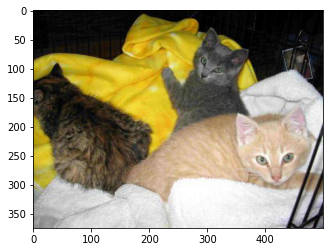

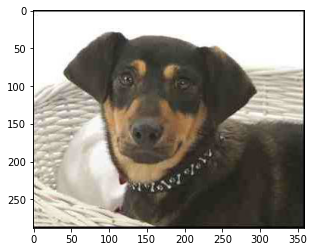

In [ ]:
#Downloading the partial cats_and_dogs dataset. The link is povided by Laurence Moroney.

!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip


import zipfile
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Defining the directory that contains the dataset
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

#Defining the train and validation directoies for cat and dog 
train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
validation_cats_dir = os.path.join(validation_dir, 'cats') 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

#Finding the number of train and test images 
num_cat_trn_imgs = len([name for name in os.listdir(train_cats_dir)])
num_dog_trn_imgs = len([name for name in os.listdir(train_dogs_dir)])

num_cat_val_imgs = len([name for name in os.listdir(validation_cats_dir)])
num_dog_val_imgs = len([name for name in os.listdir(validation_dogs_dir)])


print('num_cat_trn_imgs =',num_cat_trn_imgs, 'num_dog_trn_imgs =',num_dog_trn_imgs,
      'ttl_num_trn_imgs = ', num_cat_trn_imgs+num_dog_trn_imgs)

print('num_cat_val_imgs =',num_cat_val_imgs, 'num_dog_val_imgs =',num_dog_val_imgs,
      'ttl_num_val_imgs = ', num_cat_val_imgs+num_dog_val_imgs)

#Displaying random images from the training dataset 
exmp_trn_cat_path = os.path.join(train_cats_dir,
                                         os.listdir(train_cats_dir)[random.randint(0,num_cat_trn_imgs-1)]) 
exmp_trn_cat = mpimg.imread(exmp_trn_cat_path)
                                    
plt.imshow(exmp_trn_cat)
plt.show()

exmp_trn_dog_path = os.path.join(train_dogs_dir,
                                         os.listdir(train_dogs_dir)[random.randint(0,num_dog_trn_imgs-1)])
exmp_trn_dog = mpimg.imread(exmp_trn_dog_path)
                                         
plt.imshow(exmp_trn_dog)
plt.show()



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Generating the train dataset with ImageDataGenerator and applying image augmentation to reduce overfitting
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Normalizing the test images
test_datagen = ImageDataGenerator( rescale = 1/255. )

#Using flow_from_directory to create the train data in batches of 20 images
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

#Using flow_from_directory to create the test data in batches of 20 images
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#Fitting the model

history = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 20, validation_steps = 50, verbose = 1)

Epoch 1/20
100/100 [==============================] - 19s 191ms/step - loss: 0.3772 - accuracy: 0.8610 - val_loss: 0.1794 - val_accuracy: 0.9370
Epoch 2/20
100/100 [==============================] - 18s 182ms/step - loss: 0.2146 - accuracy: 0.9200 - val_loss: 0.0816 - val_accuracy: 0.9720
Epoch 3/20
100/100 [==============================] - 18s 182ms/step - loss: 0.1972 - accuracy: 0.9255 - val_loss: 0.1029 - val_accuracy: 0.9640
Epoch 4/20
100/100 [==============================] - 18s 182ms/step - loss: 0.2067 - accuracy: 0.9280 - val_loss: 0.1036 - val_accuracy: 0.9660
Epoch 5/20
100/100 [==============================] - 18s 181ms/step - loss: 0.1893 - accuracy: 0.9280 - val_loss: 0.2054 - val_accuracy: 0.9400
Epoch 6/20
100/100 [==============================] - 18s 182ms/step - loss: 0.1723 - accuracy: 0.9355 - val_loss: 0.0935 - val_accuracy: 0.9760
Epoch 7/20
100/100 [==============================] - 18s 183ms/step - loss: 0.1786 - accuracy: 0.9360 - val_loss: 0.1390 - val_ac

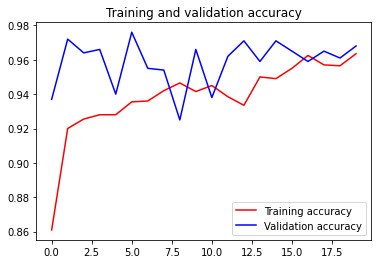

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting the loss and accuracy VS epochs 

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
#Testing the trained model on images outside the cats_and_dogs dataset
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  y=image.img_to_array(img)
  y=np.expand_dims(y/255, axis=0)
  images = np.vstack([y])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving cat1.jpeg to cat1.jpeg
Saving cat2.jpeg to cat2.jpeg
Saving cat3.png to cat3.png
Saving cat4.jpeg to cat4.jpeg
Saving cat5.jpeg to cat5.jpeg
Saving cat6.jpeg to cat6.jpeg
Saving cat7jpeg to cat7jpeg
Saving cat8.jpg to cat8.jpg
Saving cat9.jpeg to cat9.jpeg
Saving cat10.jpeg to cat10.jpeg
Saving cat11.jpeg to cat11.jpeg
Saving cat12.jpeg to cat12.jpeg
Saving cat13.jpeg to cat13.jpeg
Saving cat14.jpeg to cat14.jpeg
Saving cat15.jpeg to cat15.jpeg
Saving dog1.jpg to dog1.jpg
Saving dog2.jpg to dog2.jpg
Saving dog3.png to dog3.png
Saving dog4.jpeg to dog4.jpeg
Saving dog5.jpeg to dog5.jpeg
Saving dog6.jpeg to dog6.jpeg
Saving dog7.jpeg to dog7.jpeg
Saving dog8.jpeg to dog8.jpeg
Saving dog9.jpeg to dog9.jpeg
Saving dog10.jpeg to dog10.jpeg
Saving dog11.jpeg to dog11.jpeg
Saving dog12.jpeg to dog12.jpeg
Saving dog13.jpeg to dog13.jpeg
Saving dog14.jpeg to dog14.jpeg
Saving dog15.jpeg to dog15.jpeg
[0.00011504]
cat1.jpeg is a cat
[2.5802138e-11]
cat2.jpeg is a cat
[3.2125547e-19]
cat3.